In [1]:
import numpy as np
x_data  = np.array([1, 2, 3, 4, 5]).reshape(5,1) # 입력데이터 초기화 (x = 학습데이터)
t_data = np.array([2, 3, 4, 5, 6]).reshape(5,1) # 정답데이터 초기화 (t = target data)

In [2]:
x_data

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [3]:
t_data

array([[2],
       [3],
       [4],
       [5],
       [6]])

In [4]:
w = np.random.rand(1,1)
b = np.random.rand(1)

In [5]:
w

array([[0.98508275]])

In [6]:
b

array([0.00455981])

In [7]:
def loss_func(x, t):# 손실함수
     y = np.dot(x,W) + b # dot은 행렬연산자이다.
     return (np.sum((t - y)**2 )) / (len(x))

In [8]:
# 수치미분 함수
def numerical_derivative(f, x):
     delta_x = 1e-4 # 0.0001
     grad = np.zeros_like(x) 
     it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite']) #nditer => 인덱스 정보를 만들어주는 함수
     while not it.finished:
         idx = it.multi_index #multi_index => 행과 열을 다 가져옴
         tmp_val = x[idx]
         x[idx] = float(tmp_val) + delta_x
         fx1 = f(x) # f(x+delta_x)

         x[idx] = float(tmp_val) - delta_x 
         fx2 = f(x) # f(x-delta_x)
         grad[idx] = (fx1 - fx2) / (2*delta_x) # x[idx] ~(fx1 - fx2) => 미분을 계산한 식

         x[idx] = tmp_val 
         it.iternext()
     return grad


In [9]:
learning_rate = 1e-2 # 학습율 α
f = lambda x : loss_func(x_data, t_data) 
W = np.random.rand(1,1)
print("Initial loss value = ", loss_func(x_data, t_data), "Initial W = ", W, "\n", ", b = ", b )

for step in range(6001):
 W -= learning_rate * numerical_derivative(f, W) 
 b -= learning_rate * numerical_derivative(f, b)
 if (step % 300 == 0): # 추가부분
     print("step = ", step, "loss value = ", loss_func(x_data, t_data), "W =", W, "b =", b)

Initial loss value =  6.127738555279149 Initial W =  [[0.53616837]] 
 , b =  [0.00455981]
step =  0 loss value =  3.6554673707356935 W = [[0.69793774]] b = [0.04259235]
step =  300 loss value =  0.016372922302560204 W = [[1.08309212]] b = [0.70008451]
step =  600 loss value =  0.0020786046341033553 W = [[1.0296062]] b = [0.89313838]
step =  900 loss value =  0.00026388674819764914 W = [[1.01054886]] b = [0.96192459]
step =  1200 loss value =  3.350142433621519e-05 W = [[1.00375862]] b = [0.98643351]
step =  1500 loss value =  4.253132983074894e-06 W = [[1.00133922]] b = [0.99516618]
step =  1800 loss value =  5.399513761022608e-07 W = [[1.00047717]] b = [0.99827768]
step =  2100 loss value =  6.854887672571828e-08 W = [[1.00017002]] b = [0.99938633]
step =  2400 loss value =  8.702540095842919e-09 W = [[1.00006058]] b = [0.99978135]
step =  2700 loss value =  1.1048204979804822e-09 W = [[1.00002158]] b = [0.99992209]
step =  3000 loss value =  1.40261155857239e-10 W = [[1.00000769]] b 

In [10]:
def predict(x): # 예측 함수
 y = np.dot(x,W) + b # 업데이트가 끝난 최종적인 것이 구해짐
 return y


In [11]:
predict(np.array([43])) # 예측 테스트

array([44.00000001])

In [12]:
import numpy as np
A = np.array([[1,2,3,4], [5,6,7,8]])

print(A, '\n')
print('A.shape==', A.shape,'\n')

it = np.nditer(A, flags = ['multi_index'], op_flags = ['readwrite']) #multi_index => 여러 인덱스를 사용하겠다.
while not it.finished:
    idx = it.multi_index
    print(idx, 'current value => ', A[idx])
    it.iternext()

[[1 2 3 4]
 [5 6 7 8]] 

A.shape== (2, 4) 

(0, 0) current value =>  1
(0, 1) current value =>  2
(0, 2) current value =>  3
(0, 3) current value =>  4
(1, 0) current value =>  5
(1, 1) current value =>  6
(1, 2) current value =>  7
(1, 3) current value =>  8


독립변수가 여러개 일 경우

In [13]:
import numpy as np
loaded_data = np.loadtxt('./data_01.csv', delimiter=',', dtype=np.float32)
x_data = loaded_data[:, 0:-1]
t_data = loaded_data[:, [-1]] 
# 데이터 차원 및 shape 확인
print("x_data.ndim = ", x_data.ndim, ", x_data.shape = ", x_data.shape)
print('---------------------------')
print("t_data.ndim = ", t_data.ndim, ", t_data.shape = ", t_data.shape)
print('---------------------------')
W = np.random.rand(3,1) # 가중치 W 초기화
b = np.random.rand(1) # 바이어스 b 초기화
print("W = ", W, ", W.shape = ", W.shape, ", b = ", b, ", b.shape = ", b.shape)
print('---------------------------')



x_data.ndim =  2 , x_data.shape =  (9, 3)
---------------------------
t_data.ndim =  2 , t_data.shape =  (9, 1)
---------------------------
W =  [[0.98984178]
 [0.62738188]
 [0.19471694]] , W.shape =  (3, 1) , b =  [0.1581278] , b.shape =  (1,)
---------------------------


In [14]:
# 가중치 W, 바이어스 b 업데이트 및 학습과정 결과
learning_rate = 1e-5
f = lambda x : loss_func(x_data,t_data)
print("Initial loss value = ", loss_func(x_data, t_data) )
for step in range(30001):
     W -= learning_rate * numerical_derivative(f, W) 
     b -= learning_rate * numerical_derivative(f, b)
     if (step % 3000 == 0):
         print("step = ", step, "loss value = ", loss_func(x_data, t_data))

Initial loss value =  319.0175228730482
step =  0 loss value =  136.63637973514105
step =  3000 loss value =  6.954919287101838
step =  6000 loss value =  4.784216948770575
step =  9000 loss value =  4.0351607684896
step =  12000 loss value =  3.7642610093189117
step =  15000 loss value =  3.664951638117427
step =  18000 loss value =  3.6283677331482704
step =  21000 loss value =  3.614828355041442
step =  24000 loss value =  3.60976666929812
step =  27000 loss value =  3.607825040231187
step =  30000 loss value =  3.6070319522752934


In [15]:
test_data = np.array([100, 98, 81])
predict(test_data)


array([178.99206178])

In [16]:
loaded_data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.]], dtype=float32)

### 사이킷런으로 실습하기

In [17]:
# 연습용 데이터 불러오기
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42) #test_size가 생략됨. => 생략되면 0.25%임


C:\project\ai_source\AI_01\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

In [18]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [19]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [20]:
data.data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [21]:
# 모델 생성 및 학습
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [22]:
# 모델 예측 및 평가
score = model.score(X_test, y_test) #결정계수를 이용
print("정확도 :", score)
cofficient = model.coef_
intercept = model.intercept_
print("계수 :", cofficient)
print("절편 :", intercept)

정확도 : 0.6844267283527141
계수 : [-1.28322638e-01  2.95517751e-02  4.88590934e-02  2.77350326e+00
 -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
  2.57761243e-01 -9.95694820e-03 -9.23122944e-01  1.31854199e-02
 -5.17639519e-01]
절편 : 29.83642016383914


In [23]:
model.coef_

array([-1.28322638e-01,  2.95517751e-02,  4.88590934e-02,  2.77350326e+00,
       -1.62388292e+01,  4.36875476e+00, -9.24808158e-03, -1.40086668e+00,
        2.57761243e-01, -9.95694820e-03, -9.23122944e-01,  1.31854199e-02,
       -5.17639519e-01])

In [24]:
model.intercept_

29.83642016383914

 ### 추가예제 - 단순 회귀 분석
 @ 선형회귀에서는 특정 독립변수가 다른 독립변수에게 영향을 미치지 말아야 한다.

In [25]:
from scipy import stats 

x = [32,64,96,118,126,144,152,158] # X = 학습데이터 , 독립변수가 하나인 구조
y = [18,24,61.5,49,52,105,130,125] # y = label이라고 생각하면 된다.

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y) # 선형 최소 제곱 회귀를 계산. //linregress=>선형회귀모델을 구하는 것
print("slope: {}\nintercept: {}\nr_value: {}\np_value: {}\nstd_err: {}"\
 .format(slope, intercept, r_value, p_value, std_err))


slope: 0.8744839346616406
intercept: -26.723837731107523
r_value: 0.8880668255497455
p_value: 0.00321829451984264
std_err: 0.18480710092393707


– slope:선형 모델의 기울기

– intercept:절편

– r_value:상관 계수 (* 상관계수를 제곱한 값 = 결정계수)

– p-value:불확실성을 나타내는값

– std_err:에러의 표준 편차

– p-value는 통계학에서 예측 불확실성의 정도를 나타내는 값으로 일반적으로 0.05 미만일 때
유의미하다고 본다.
이번 예제에서 상관 계수는 0.888로 두 변수 간에 양의 상관 관계가 있으며 통계학적
으로도 유의미하다는 것을 알 수 있다.


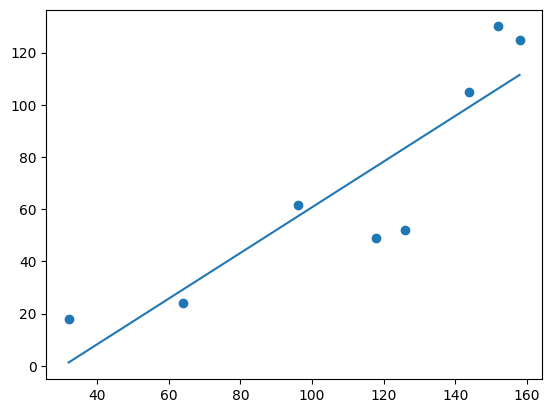

In [26]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.plot(x, slope * np.array(x) + intercept, '-') # slope * np.array(x) + intercept => 예측값이다. // '-' => 선 스타일이다.
plt.show()

### 추가예제2 - 다중 회귀 분석

In [27]:
from sklearn.datasets import load_boston
boston = load_boston()

boston

C:\project\ai_source\AI_01\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [28]:
X = boston.data
y = boston.target

In [29]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [30]:
# 데이터 분할하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [31]:
X_train.shape, X_test.shape

((354, 13), (152, 13))

In [32]:
# MinMaxScaler : 최대/최소값이 각각 1, 0이 되도록 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1)) # feature_range=(0,1) 이게 디폴트 값이다.
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# scikit-learn 패키지를 사용하여 선형 회귀분석을 하는 경우에는 linear_model 서브 패키지의 클래스를 사용한다
LinearRegression 
from sklearn.linear_model import LinearRegression

In [34]:
# 회귀분석을 하고 나면 모형 객체는 다음과 같은 속성을 가지게 된다. 또한 fit 메서드는 객체 자신을 반환
model_boston = LinearRegression().fit(X_train_scaled, y_train)
print(model_boston.coef_) # coef_ : 추정된 가중치 벡터(W) (기울기값)
print(model_boston.intercept_) # intercept_ : 추정된 상수항(b) (절편)

[ -9.82323014   4.43442576  -0.78034296   1.00069945  -8.02260561
  16.86590716   0.6158999  -15.66954885   6.38446831  -5.74393433
  -9.48771446   3.64790082 -17.78686268]
29.15634230243903


In [35]:
# score() : 결정 계수 R^2 점수를 계산. 결정 계수는 -1~1 사이의 값을 가짐.
model_boston.score(X_train_scaled, y_train)


0.736532400571146

In [36]:
from sklearn.model_selection import cross_val_score
r2 = cross_val_score(model_boston, X_train_scaled, y_train, cv=5) #회귀 모델의 정확도는 결정계수 이다. 결정 계수는 r2 score 이다.
r2


array([0.73974106, 0.65566829, 0.65401806, 0.6480328 , 0.7930589 ])

In [37]:
r2.mean() # 평균 출력


0.6981038224065392

In [38]:
import math
from sklearn.metrics import mean_squared_error # mean_squared_error: 평균 제곱 오차(mean squared error)

math.sqrt(mean_squared_error(y_train, model_boston.predict(X_train_scaled))) # 표준오차 구함(평균제곱 오차)


4.464926778058505

In [39]:
y_pred = model_boston.predict(X_test_scaled)
y_pred

array([35.30664502, 18.88938907, 21.52250483, 18.01310724, 24.74740435,
       10.36712412, 34.74194922, 32.7440355 , 20.02144275, 38.32185542,
       14.73418245, 21.16214125, 18.1094778 , 19.47924981, 35.09173745,
       40.11258262, 35.47209392, 21.64324719, 37.74701097, 19.32978593,
       26.33578601, 23.26983413, 21.87694414, 34.41336661, 26.73872074,
       16.50577261, 21.28844221, 23.49175045, 26.83062631, 29.84894842,
       18.03834182,  4.36515662, 27.75983148, 26.46710747, 33.12171933,
        4.63479478, 21.63433835, 21.13189999, 24.98918002, 23.77226104,
       -4.53963898, 22.36059344, 25.26263103, 39.62125692, 23.84386437,
       25.22835432, 17.89346645, 39.58647061, 16.58469244, 26.01325516,
       15.64310798, 30.38501882, 16.94349919, 24.29405028, 21.25996478,
       23.10775115, 22.798832  , 31.0587475 , 25.04839392, 24.86346515,
       20.47226561, 17.55630817, 34.87252367, 24.50635236, 14.13331904,
       20.83931124, 27.50619208, 23.66739654, 26.30710582, 35.39

In [40]:
import math
from sklearn.metrics import mean_squared_error
rmse_test = math.sqrt(mean_squared_error(y_test, y_pred)) #RMSE : 루트 평균 제곱 오류  // R 은 루트이다.
rmse_test


5.288442059459357

In [41]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) # 결정 계수 구함. 결정계수(r2, R-squared) : 상관계수를 제곱핚 값

0.7313660874581718

### 보스턴 집값 데이터를 이용한 다중회귀식 추정

In [42]:
# 다중회귀식 추정
import statsmodels.api as sm
Boston = sm.datasets.get_rdataset("Boston", package="MASS")
boston_df = Boston.data
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [43]:
import statsmodels.formula.api as smf
formula = "medv~" + "+".join(boston_df.iloc[:,:-1].columns)
formula

'medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat'

In [44]:
model_boston = smf.ols(formula=formula, data=boston_df).fit() 
model_boston.summary()
#R-squared: 정확도임
# t = 계수(기울기)를 표준오차(표준편차)로 나눈 값이다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          6.72e-135
Time:                        10:20:54   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:

import statsmodels.formula.api as smf
formula = "medv ~ rad + zn + rm + chas + age -1"
model_boston2 = smf.ols(formula=formula, data=boston_df).fit() # formula : rad + zn + rm + chas+ age 만 포함

model_boston2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              1363.
Date:                Wed, 12 Oct 2022   Prob (F-statistic):                   5.05e-289
Time:                        10:20:54   Log-Likelihood:                         -1654.6
No. Observations:                 506   AIC:                                      3319.
Df Residuals:                     501   BIC:                                      3340.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rad           -0.2183      0.037     -5.924      0.000      -0.291      -0.146
zn             0.0161      0.015      1.056      0.291      -0.014       0.046
rm             4.7232      0.147     32.166      0.000       4.435       5.012
chas           5.6944      1.128      5.047      0.000       3.478       7.911
age           -0.0792      0.012     -6.358      0.000      -0.104      -0.055
==============================================================================
Omnibus:                      234.375   Durbin-Watson:                   0.708
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1253.471
Skew:                           2.008   Prob(JB):                    6.49e-273
Kurtosis:                       9.583   Cond. No.                         299.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 다중공선성
- 회귀분석에서 사용된 모형의 일부 변수가 다른 변수와 상관정도가 높아 데이터 분석시
부정적인 영향을 미치는 현상을 말한다.


보스턴 집값 데이터의 VIF 확인

In [46]:
# 데이터를 로드하고 포뮬러 식 정의
import statsmodels.api as sm
Boston = sm.datasets.get_rdataset("Boston", package="MASS")
boston_df = Boston.data
formula = "medv~" + "+".join(boston_df.iloc[:, :-1].columns) # -1은 intercepter를 가르킴
formula

'medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat'

In [47]:
from patsy import dmatrices # 디자인 행렬 수행
y, X = dmatrices(formula, boston_df, return_type="dataframe") # fomula 식을 이용해서 학습데이터와 타겟데이터를 분리 시켜줌
X

,Intercept,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [48]:
import pandas as pd

vif = pd.DataFrame()

In [49]:
# variance_inflation_factor() : VIF 계산 함수
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) 
     for i in range(X.shape[1])] # X.shape[1]가 14이므로 for문은 14번 반복
vif["features"] = X.columns # X.columns : boston_df의 컬럼 이름 리스트
vif

,VIF Factor,features
0,585.265238,Intercept
1,1.792192,crim
2,2.298758,zn
3,3.991596,indus
4,1.073995,chas
5,4.393720,nox
6,1.933744,rm
7,3.100826,age
8,3.955945,dis
9,7.484496,rad


In [50]:
def get_vif(formula, df): 
 from patsy import dmatrices
 y, X = dmatrices(formula, df, return_type="dataframe")
 import pandas as pd
 vif = pd.DataFrame()
 from statsmodels.stats.outliers_influence import variance_inflation_factor
 vif["VIF Factor"] = [variance_inflation_factor(X.values, i) 
     for i in range(X.shape[1])]
 vif["features"] = X.columns
 return vif

In [51]:
formula = "medv~" + "+".join(boston_df.iloc[:, :-1].columns) + "-1"
get_vif(formula, boston_df)

,VIF Factor,features
0,2.100373,crim
1,2.844013,zn
2,14.485758,indus
3,1.152952,chas
4,73.894947,nox
5,77.948283,rm
6,21.386850,age
7,14.699652,dis
8,15.167725,rad
9,61.227274,tax


### 정규화 선형회귀(RIdge, Lasso, Elastic_net)

In [52]:
# 당뇨병 데이터 로드
from sklearn.datasets import load_diabetes #load => dict객체로 되어있다.
from sklearn.model_selection import train_test_split
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)


In [53]:
data.data.shape

(442, 10)

In [54]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [55]:
# Ridge Regression 모델
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0) # 하이퍼 파라미터 // alpha => lamda를 가르킨다.
ridge.fit(X_train, y_train)



Ridge()

In [56]:
ridge.score(X_test, y_test)

0.4384009113704955

In [57]:
ridge.coef_

array([  50.55155508,  -67.72236516,  278.3007281 ,  197.62401363,
         -6.2459735 ,  -26.22698465, -151.39451804,  120.32319558,
        215.85469359,  101.75554294])

In [58]:
# Lasso Regression 모델
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0) # 하이퍼 파라미터
lasso.fit(X_train, y_train)


Lasso()

In [59]:
lasso.score(X_test, y_test)

0.37914194389255096

In [60]:
# Elastic-net Regression 모델
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=1.0, l1_ratio=0.5) # 하이퍼 파라미터 // l1 => lasso를 가르킴
elastic.fit(X_train, y_train)

ElasticNet()

In [61]:
elastic.score(X_test, y_test)

-0.0044383730131891674

In [62]:
elastic.coef_

array([ 0.41308763,  0.        ,  3.29899112,  2.25693877,  0.33937965,
        0.08078391, -1.87466133,  2.1438686 ,  2.94796429,  1.70198081])

In [63]:
# 정규화 선형회귀 모델별 가중치(계수) 비교
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# 선형 모델을 비교하기 위해 생성
linear = LinearRegression()
linear.fit(X_train, y_train)

# 계수를 핚 문에 비교하기 위한 DataFrame
coefs = np.vstack((linear.coef_, ridge.coef_, lasso.coef_, elastic.coef_))
index = ['linear', 'ridge', 'lasso', 'elastic']
coefs_df = pd.DataFrame(coefs, columns=data.feature_names, index=index)
print("정규화 선형회귀 모댈별 가중치(계수) 비교")
coefs_df

정규화 선형회귀 모댈별 가중치(계수) 비교


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
linear,47.746571,-241.991804,531.968569,381.565299,-918.490206,508.251474,116.940405,269.485086,695.806221,26.323431
ridge,50.551555,-67.722365,278.300728,197.624014,-6.245973,-26.226985,-151.394518,120.323196,215.854694,101.755543
lasso,0.000000,-0.000000,398.384368,46.178843,0.000000,0.000000,-0.000000,0.000000,238.187402,0.000000
elastic,0.413088,0.000000,3.298991,2.256939,0.339380,0.080784,-1.874661,2.143869,2.947964,1.701981


LInearRegression을 이용한 보스턴 주택 가격 예측

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline


In [65]:
boston = load_boston()


C:\project\ai_source\AI_01\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

In [66]:
# boston 데이타셋 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

In [67]:
# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


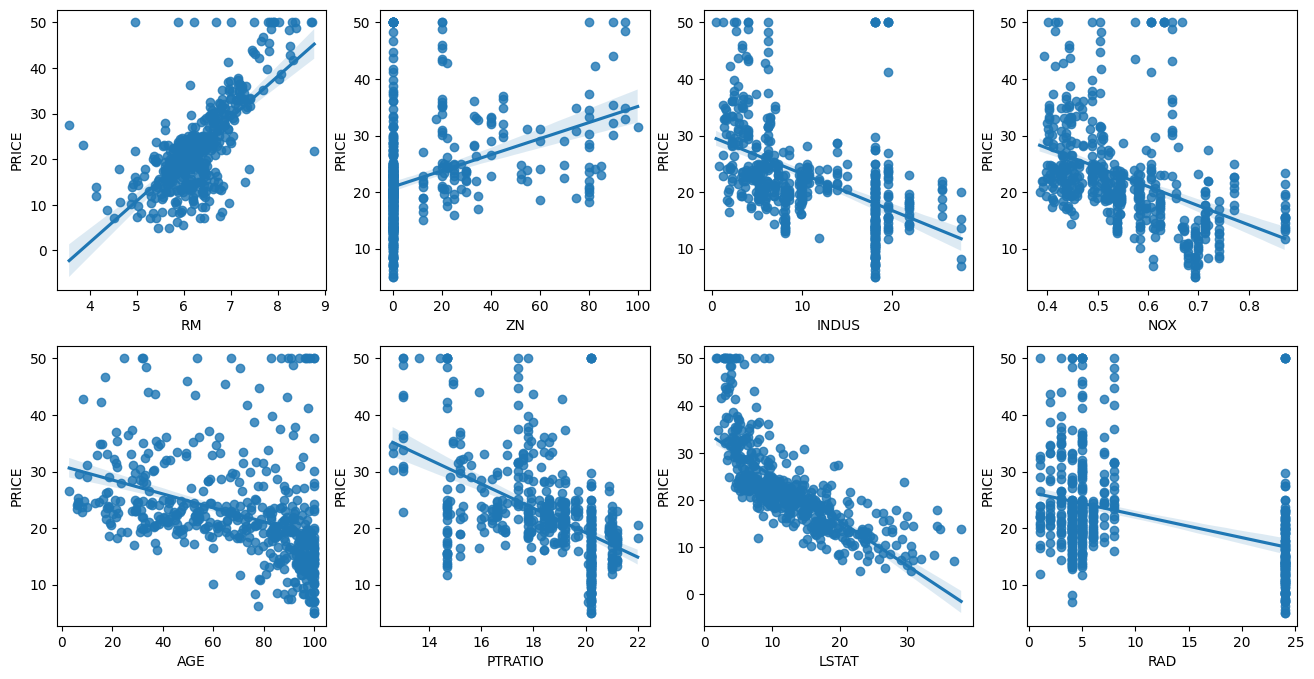

In [68]:
fig, axs = plt.subplots(figsize = (16,8), ncols = 4, nrows= 2) 
lm_features = ['RM','ZN','INDUS', 'NOX', 'AGE', 'PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x = feature, y = 'PRICE', data = bostonDF, ax = axs [row][col])

In [69]:
bostonDF.corr() # 상관관계 분석

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [71]:
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

In [72]:
# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse) # sqrt => 루트를 씌움,// mse :평균제곱오차
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757
절편 값: 40.99559517216429
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [73]:
alphas = [0,0.1,1,10,100]

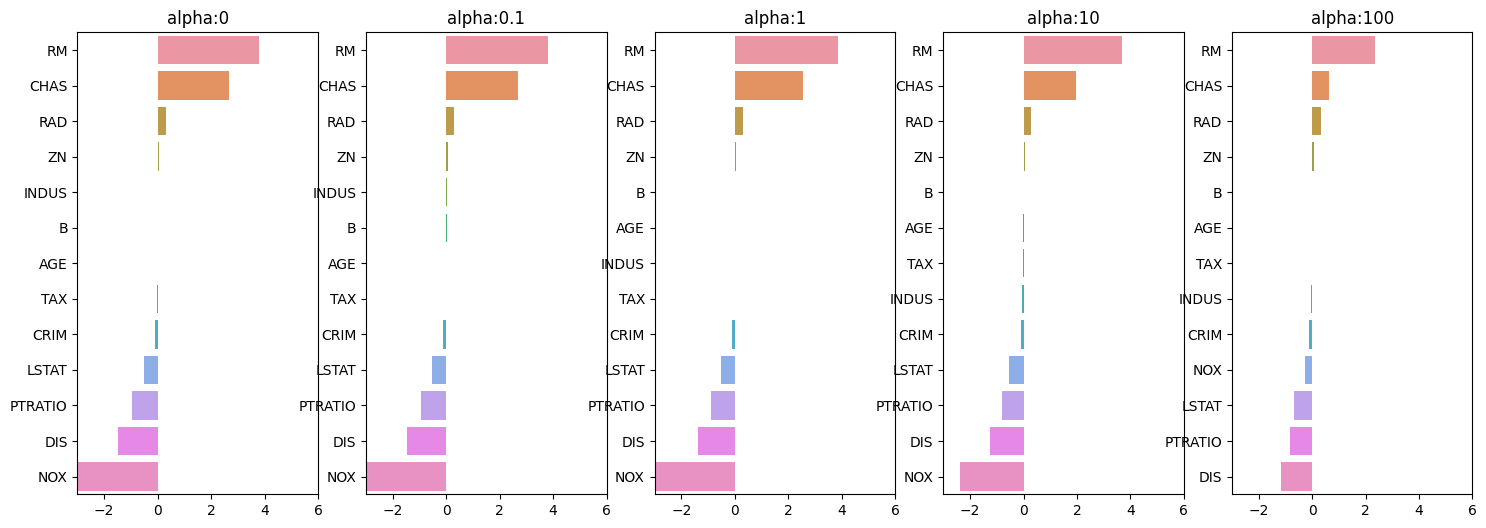

In [74]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import cross_val_score

fig, axs = plt.subplots(figsize = (18,6), nrows =1, ncols = 5)
coeff_df = pd.DataFrame()
for pos , alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    coeff = pd.Series(data = ridge.coef_, index = X_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    coeff = coeff.sort_values(ascending = False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x = coeff.values, y = coeff.index, ax = axs[pos])
plt.show()

In [75]:
ridge_alphas = [0,0.1,1,10,100]
sort_column = 'alpha:' + str(ridge_alphas[0])
coeff_df.sort_values(by= sort_column, ascending = False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [76]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import cross_val_score
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환

def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
verbose=True):
     coeff_df = pd.DataFrame()
     if verbose : print('#######', model_name , '#######')
     for param in params:
         if model_name =='Ridge': model = Ridge(alpha=param)
         elif model_name =='Lasso': model = Lasso(alpha=param)
         elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
         neg_mse_scores = cross_val_score(model, X_data_n, 
                 y_target_n, scoring="neg_mean_squared_error", cv = 5)
         avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
         print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
         # cross_val_score는 evaluation metric맊 반환하므로 모델을 다시 학습하여 회귀 계수 추출
            
         model.fit(X_data , y_target)
         # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
         coeff = pd.Series(data=model.coef_ , index=X_data.columns )
         colname='alpha:'+str(param)
         coeff_df[colname] = coeff
     return coeff_df

In [77]:
lasso_alphas = [0.05, 0.07,0.1,0.5,1,3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params = lasso_alphas, X_data_n = X_data, y_target_n = y_target)

####### Lasso #######
alpha 0.05일 때 5 폴드 세트의 평균 RMSE: 5.628 
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


In [78]:
sort_column = 'alpha:' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.05,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.836618,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.761631,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.271034,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.048826,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010193,0.010248,0.010249,0.009469,0.008247,0.006510
AGE,-0.011858,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014028,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.041355,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098935,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000
LSTAT,-0.553925,-0.560431,-0.568769,-0.656290,-0.761115,-0.807679


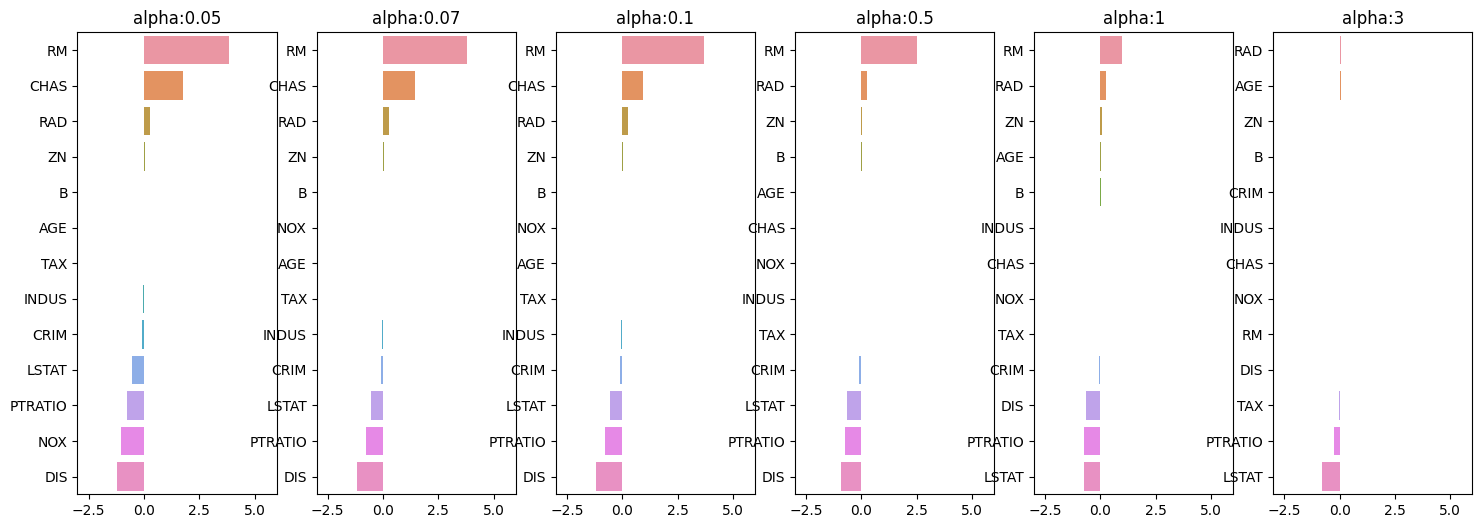

In [79]:
fig, axs = plt.subplots(figsize = (18,6), nrows=1, ncols = 6)
for pos, alpha in enumerate(lasso_alphas):
    colname = 'alpha:' + str(alpha)
    coeff = coeff_lasso_df[colname]
    coeff = coeff.sort_values(ascending = False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x = coeff.values, y = coeff.index, ax = axs[pos])
plt.show()

## 선형회귀 문제
### - 타이타닉 데이터 사용 예제
- target: Servived
- Passengerid,Name, Ticket, Cabin 컬럼은 삭제
- Nan 데이터는 삭제
- Sex, Embarked는 레이블 인코딩
- Age, Fare는 MinMaxScaler로 전처리

전체 독립변수를 사용했을 때와 VIF 10이상을 제거한 독립변수를 사용했을 때의 OLS결과값을 구하시오(summary 비교). 

#### ------------------------내가 한것---------------------------

In [80]:
new_df['Sex'] = sex_encoded
new_df['Embarked'] = embarked_encoded
new_df

NameError: name 'sex_encoded' is not defined

In [ ]:
new_df.isnull()

In [ ]:
new_df.dropna(axis = 0, inplace = True )


In [ ]:
new_df

In [ ]:
new_df['Age'].mean()

---------------교수님이 한 것------------------
위의 것은 다 같은데 minmax 전처리 이후부터 모름 , 그 이후 부터 적기

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('./titanic/train.csv')
df

In [ ]:
df2= df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
df2

In [ ]:
df2.dropna(axis = 0, inplace = True )

In [ ]:
df2.reset_index(drop = True, inplace = True)
df2

In [ ]:
target = df2.Survived

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df2['Sex'])
sex_encoded = le.transform(df2['Sex'])
sex_encoded

le.fit(df2['Embarked'])
embarked_encoded = le.transform(df2['Embarked'])
embarked_encoded

In [ ]:
df2['Sex'] = sex_encoded
df2['Embarked'] = embarked_encoded
df2


여기부터가 minmaxscale임


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm_Age = mm.fit_transform(df2[['Age']])
df2['Age'] = mm_Age

mm_Fare = mm.fit_transform(df2[['Fare']])
df2['Fare'] = mm_Fare
df2

In [ ]:
def get_vif(formula, df): 
 from patsy import dmatrices
 y, X = dmatrices(formula, df, return_type="dataframe")
 import pandas as pd
 vif = pd.DataFrame()
 from statsmodels.stats.outliers_influence import variance_inflation_factor
 vif["VIF Factor"] = [variance_inflation_factor(X.values, i) 
     for i in range(X.shape[1])]
 vif["features"] = X.columns
 return vif

In [ ]:
formula='Survived~Pclass+Sex+Age+SibSp+Parch+Fare+Embarked'
print(formula)
get_vif(formula,df2)

In [ ]:
formula='Survived~Sex+Age+SibSp+Parch+Fare+Embarked-1'
print(formula)
get_vif(formula, df2)

In [ ]:
import statsmodels.formula.api as smf
model_titanic = smf.ols(formula=formula, data = df2).fit()
model_titanic.summary()